In [87]:
# Prediction des frais médicaux


## Phase 1 : Exploration des données (EDA)

1. Aperçu des données:

Nombre de lignes et colonnes: (1338, 7)

Colonnes disponibles:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Premières lignes:


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86



Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Statistiques descriptives:
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75% 

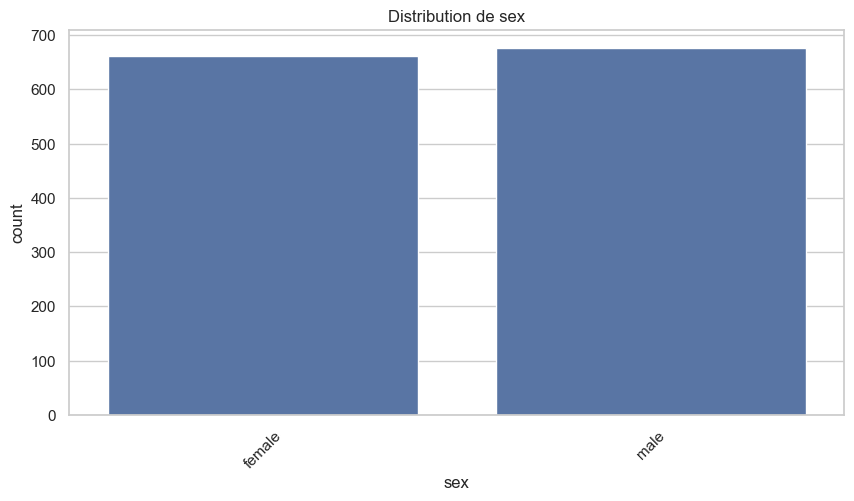


Distribution de sex:
sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64


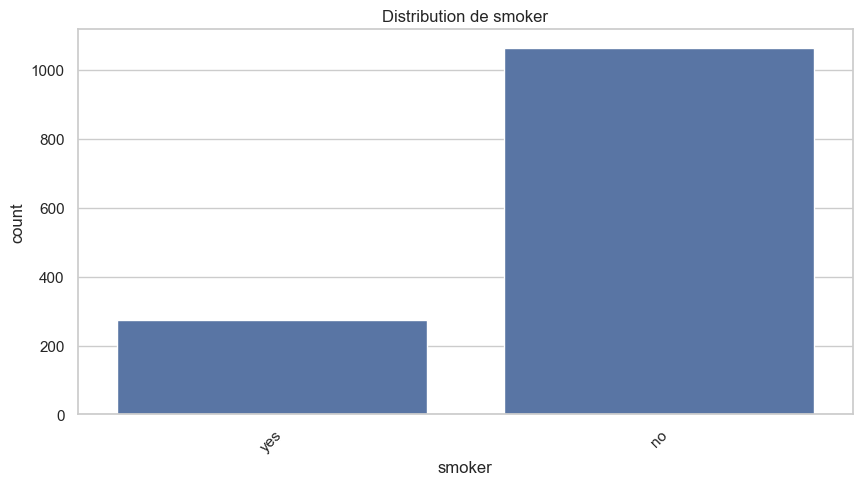


Distribution de smoker:
smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64


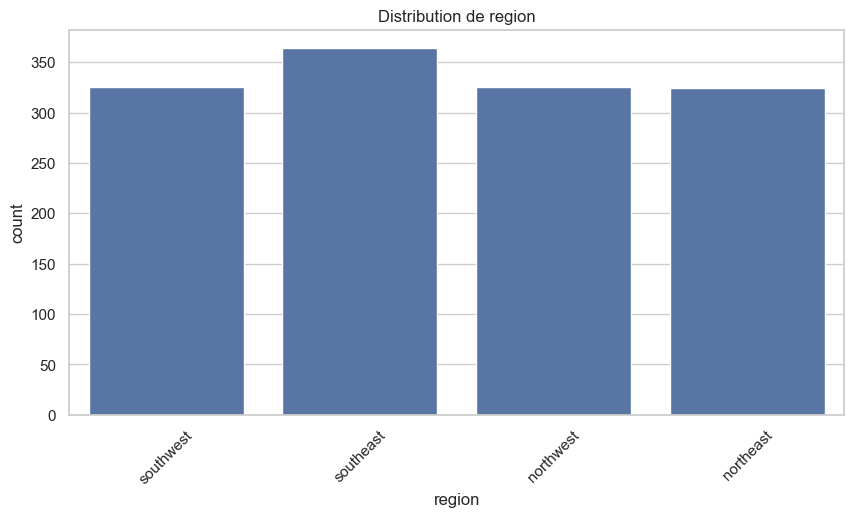


Distribution de region:
region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64

Analyse des variables numériques:


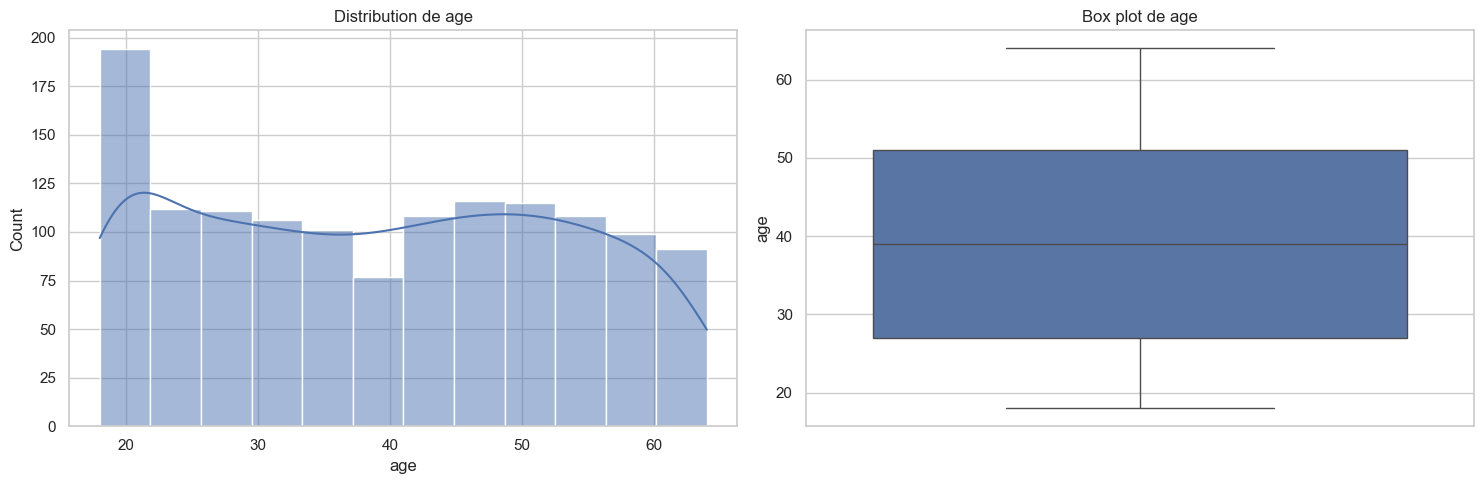


Statistiques de age:
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


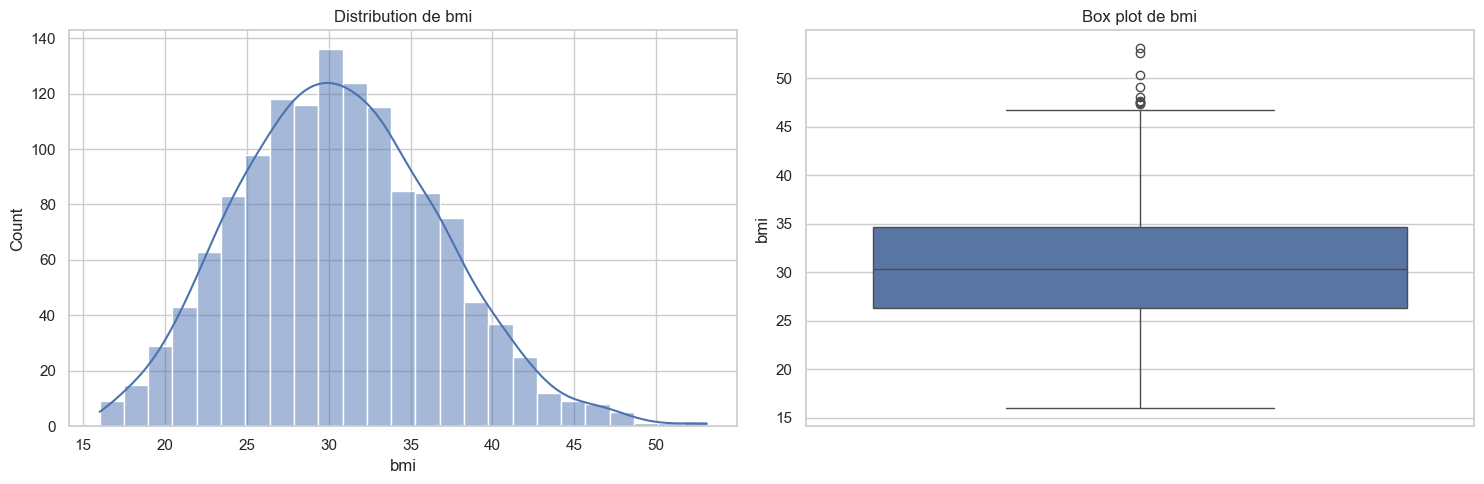


Statistiques de bmi:
count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64


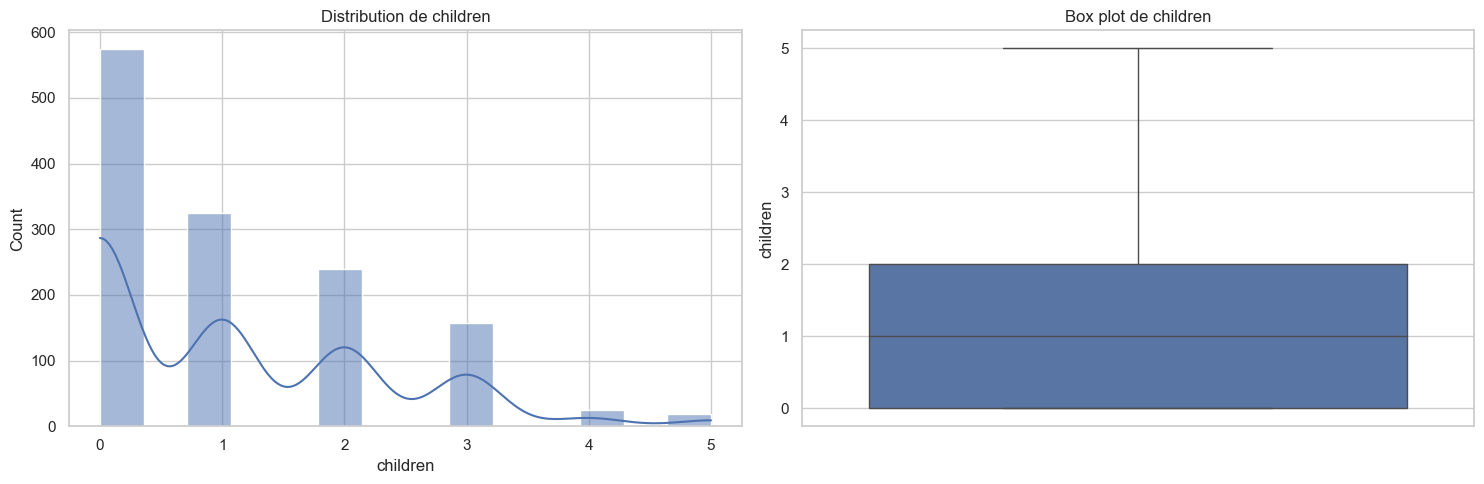


Statistiques de children:
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


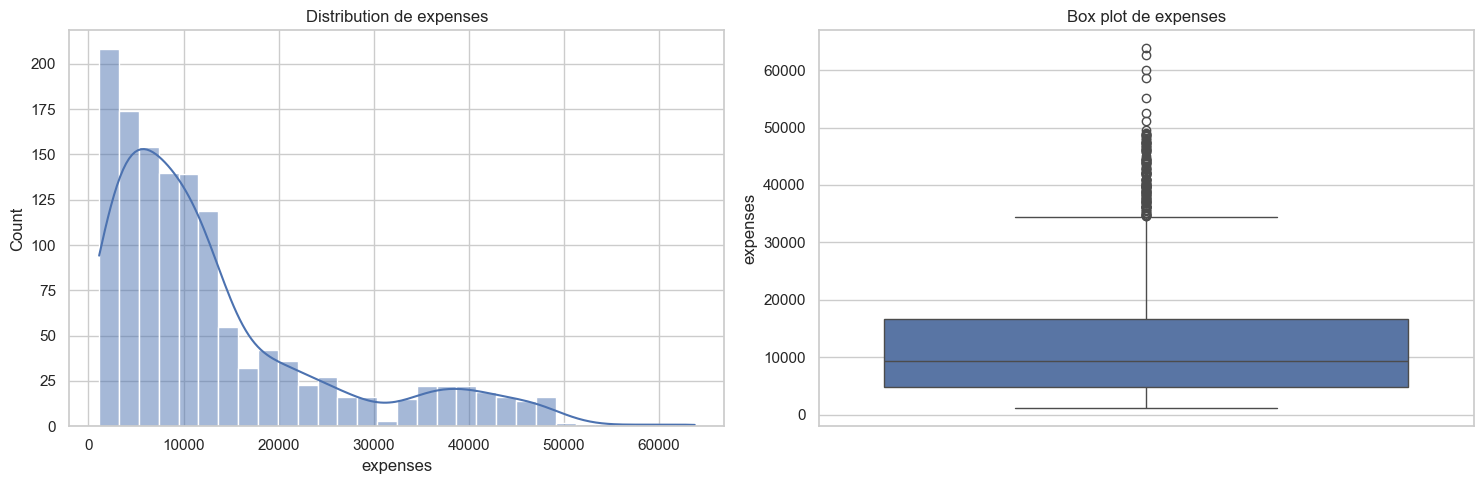


Statistiques de expenses:
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64

Analyse des corrélations:


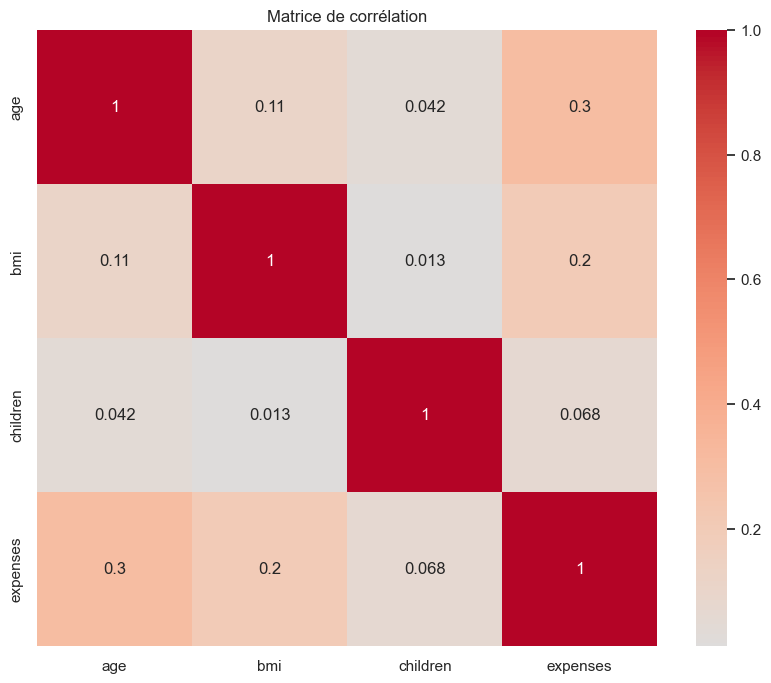


Analyse des relations avec la variable cible (expenses):


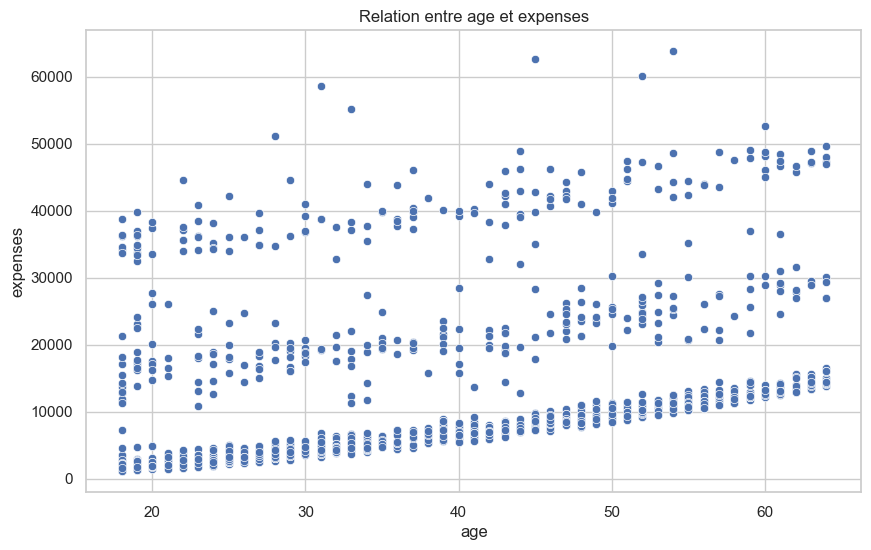

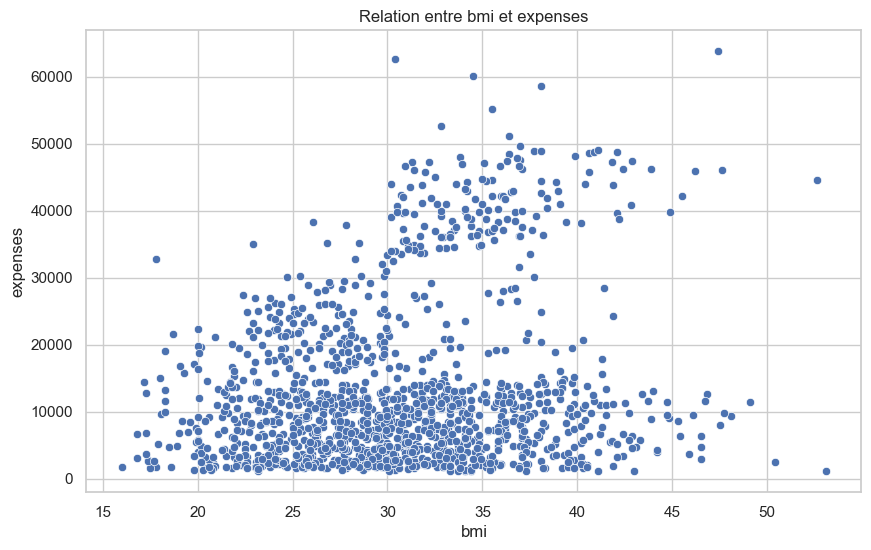

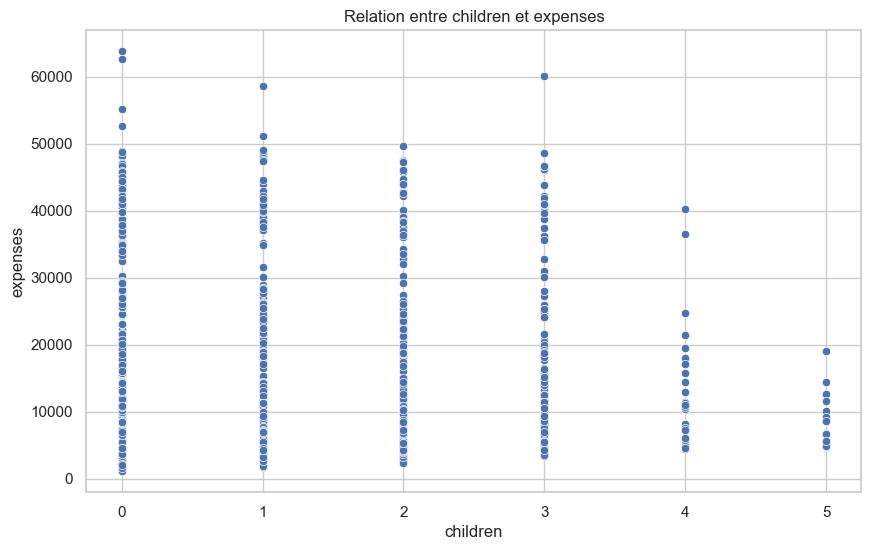

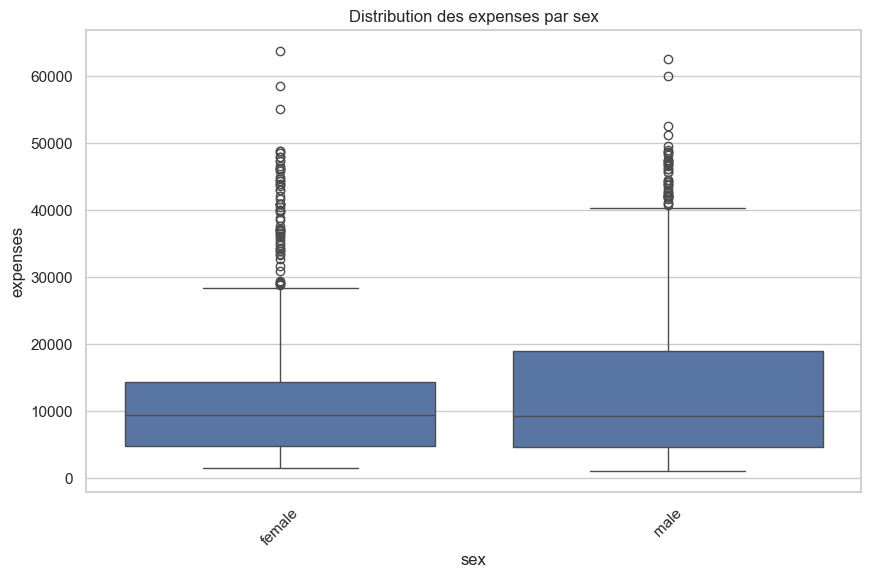

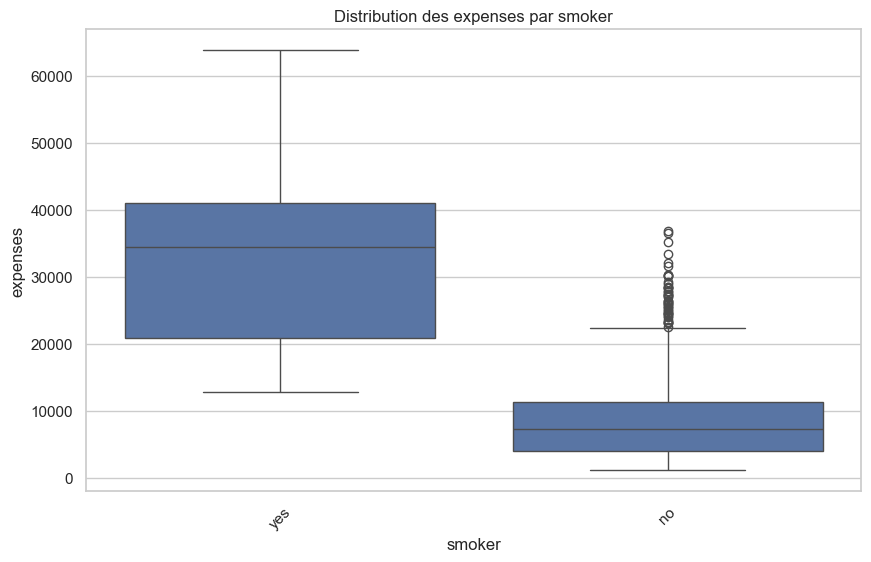

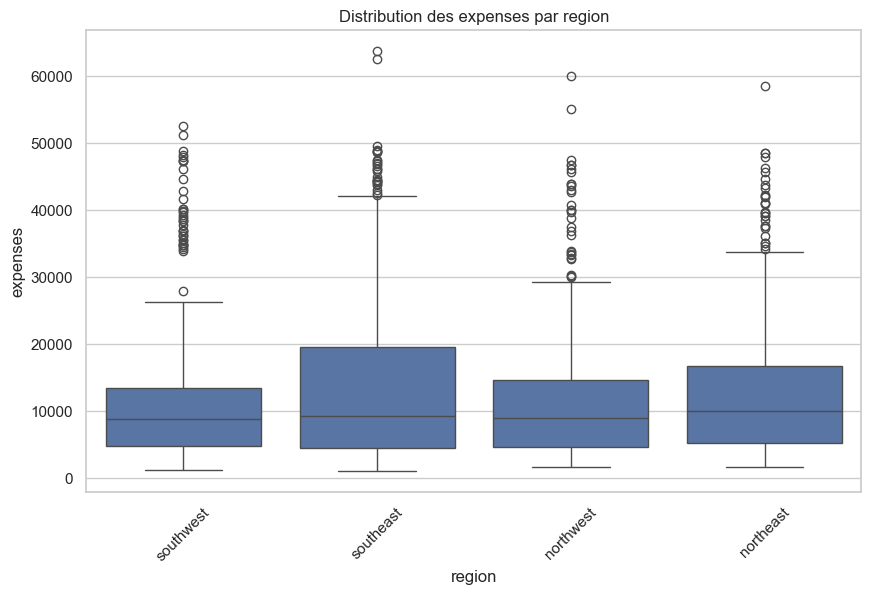


Analyse détaillée des distributions par catégorie:


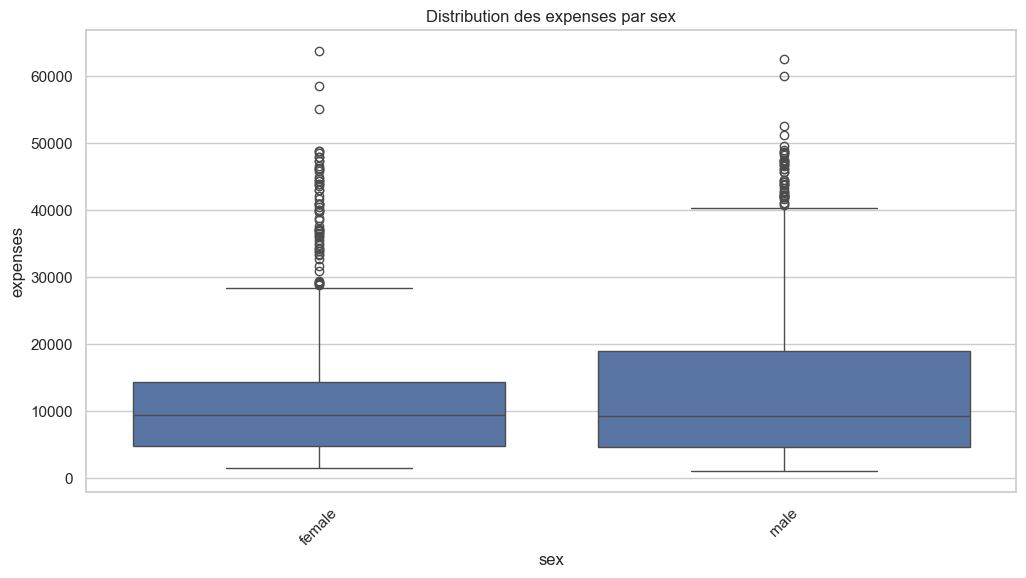


Statistiques des expenses par sex:
        count          mean           std      min        25%       50%  \
sex                                                                       
female  662.0  12569.578897  11128.703817  1607.51  4885.1625  9412.965   
male    676.0  13956.751420  12971.025897  1121.87  4619.1350  9369.615   

              75%       max  
sex                          
female  14454.690  63770.43  
male    18989.595  62592.87  


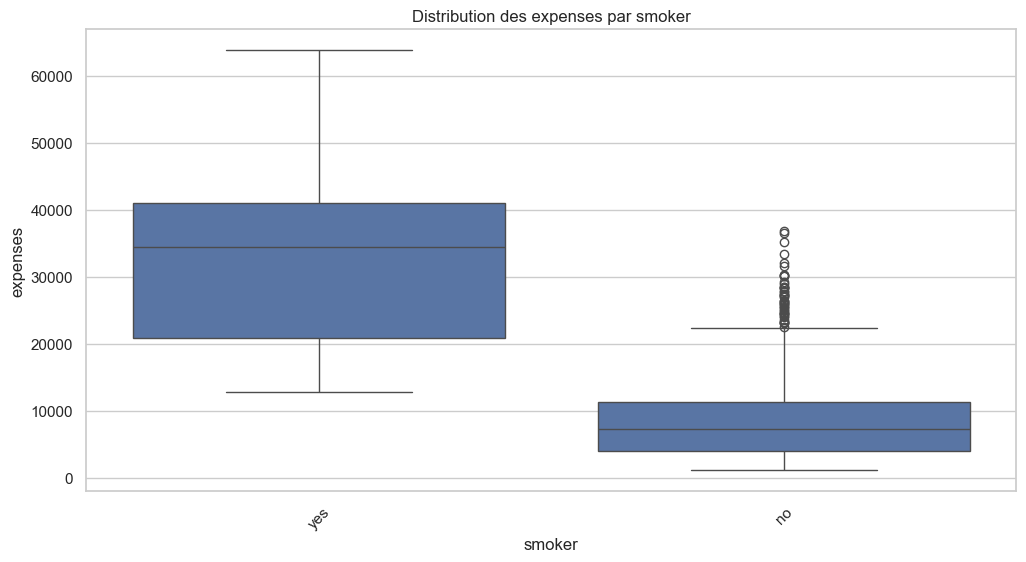


Statistiques des expenses par smoker:
         count          mean           std       min         25%        50%  \
smoker                                                                        
no      1064.0   8434.268449   5993.781756   1121.87   3986.4425   7345.405   
yes      274.0  32050.231971  11541.547338  12829.46  20826.2450  34456.350   

              75%       max  
smoker                       
no      11362.890  36910.61  
yes     41019.205  63770.43  


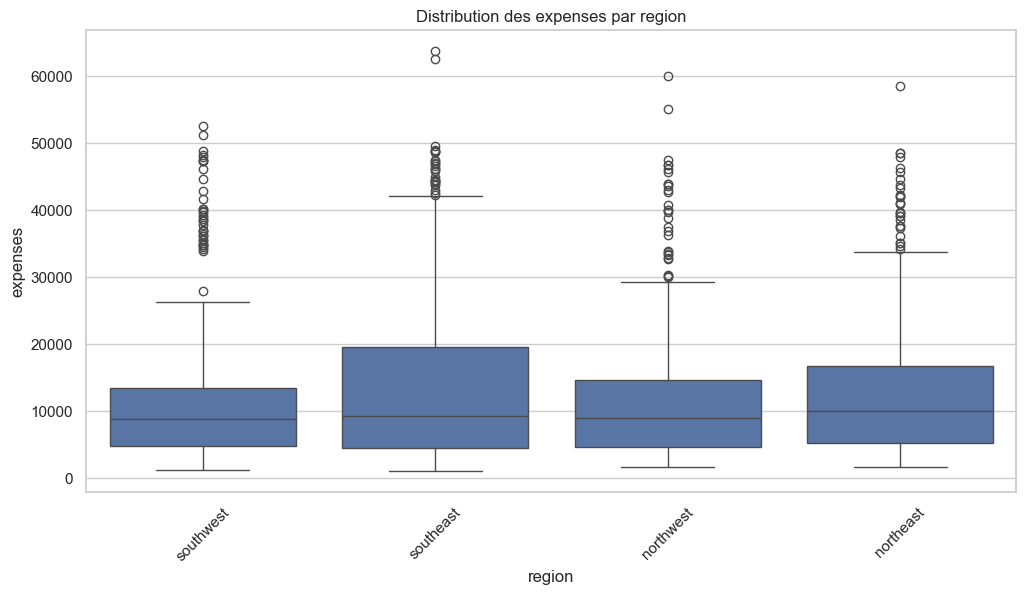


Statistiques des expenses par region:
           count          mean           std      min        25%        50%  \
region                                                                        
northeast  324.0  13406.384691  11255.802916  1694.80  5194.3225  10057.655   
northwest  325.0  12417.575169  11072.276880  1621.34  4719.7400   8965.800   
southeast  364.0  14735.411538  13971.098797  1121.87  4440.8850   9294.130   
southwest  325.0  12346.937908  11557.179033  1241.57  4751.0700   8798.590   

                  75%       max  
region                           
northeast  16687.3650  58571.07  
northwest  14711.7400  60021.40  
southeast  19526.2875  63770.43  
southwest  13462.5200  52590.83  

Résumé des analyses:
1. Statistiques globales des expenses:
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64

2. Moyenne de

In [88]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration de l'affichage
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

# Chargement des données
df = pd.read_csv('data/insurance.csv')

# ÉTAPE 1: Vérification initiale des données
print("1. Aperçu des données:")
print("\nNombre de lignes et colonnes:", df.shape)
print("\nColonnes disponibles:")
print(df.columns.tolist())
print("\nPremières lignes:")
display(df.head())
print("\nInformations sur le dataset:")
print(df.info())

# ÉTAPE 2: Statistiques descriptives
print("\nStatistiques descriptives:")
print(df.describe())

# ÉTAPE 3: Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())

# ÉTAPE 4: Analyse des variables catégorielles
def analyze_categorical(df, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution de {column}')
    plt.xticks(rotation=45)
    plt.show()
    
    print(f"\nDistribution de {column}:")
    print(df[column].value_counts(normalize=True))

# ÉTAPE 5: Analyse des variables numériques
def analyze_numerical(df, column):
    plt.figure(figsize=(15, 5))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution de {column}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box plot de {column}')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nStatistiques de {column}:")
    print(df[column].describe())

# ÉTAPE 6: Analyse des corrélations
def plot_correlations(df):
    plt.figure(figsize=(10, 8))
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matrice de corrélation')
    plt.show()

# ÉTAPE 7: Analyse bivariée
def plot_target_relationship(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Relations avec les variables numériques
    for col in numeric_cols:
        if col != 'expenses':
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x=col, y='expenses')
            plt.title(f'Relation entre {col} et expenses')
            plt.show()
    
    # Relations avec les variables catégorielles
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=col, y='expenses')
        plt.title(f'Distribution des expenses par {col}')
        plt.xticks(rotation=45)
        plt.show()

# ÉTAPE 8: Analyse des distributions par catégorie
def analyze_distribution_by_category(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=col, y='expenses')
        plt.title(f'Distribution des expenses par {col}')
        plt.xticks(rotation=45)
        plt.show()
        
        print(f"\nStatistiques des expenses par {col}:")
        print(df.groupby(col)['expenses'].describe())

# Exécution des analyses
print("\nAnalyse des variables catégorielles:")
for col in df.select_dtypes(include=['object']).columns:
    analyze_categorical(df, col)

print("\nAnalyse des variables numériques:")
for col in df.select_dtypes(include=[np.number]).columns:
    analyze_numerical(df, col)

print("\nAnalyse des corrélations:")
plot_correlations(df)

print("\nAnalyse des relations avec la variable cible (expenses):")
plot_target_relationship(df)

print("\nAnalyse détaillée des distributions par catégorie:")
analyze_distribution_by_category(df)

# ÉTAPE 9: Résumé des insights
print("\nRésumé des analyses:")
print("1. Statistiques globales des expenses:")
print(df['expenses'].describe())

print("\n2. Moyenne des expenses par région:")
print(df.groupby('region')['expenses'].mean().sort_values(ascending=False))

print("\n3. Moyenne des expenses par statut fumeur:")
print(df.groupby('smoker')['expenses'].mean().sort_values(ascending=False))

print("\n4. Corrélation entre l'âge et les expenses:")
print(df['age'].corr(df['expenses']))

print("\n5. Corrélation entre le BMI et les expenses:")
print(df['bmi'].corr(df['expenses']))

## Phase 2 : Prétraitement des données

In [89]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats

# 1. Traitement de la variable cible (expenses)
def transform_target(df):
    # Log-transformation pour gérer l'asymétrie
    df['expenses_log'] = np.log1p(df['expenses'])
    return df

# 2. Feature Engineering
def create_features(df):
    # Création de nouvelles variables
    df['bmi_category'] = pd.cut(df['bmi'], 
                               bins=[0, 18.5, 24.9, 29.9, float('inf')],
                               labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    
    # Variables d'interaction
    df['age_bmi'] = df['age'] * df['bmi']
    df['smoker_bmi'] = df['smoker'].map({'yes': 1, 'no': 0}) * df['bmi']
    
    # Age au carré pour capturer la non-linéarité
    df['age_squared'] = df['age'] ** 2
    
    return df

# 3. Encodage des variables catégorielles
def encode_categorical(df):
    # One-hot encoding pour region
    df = pd.get_dummies(df, columns=['region'], prefix='region')
    
    # Label encoding pour sex et smoker
    le = LabelEncoder()
    df['sex_encoded'] = le.fit_transform(df['sex'])
    df['smoker_encoded'] = le.fit_transform(df['smoker'])
    
    return df

# 4. Normalisation des variables numériques
def normalize_features(df):
    scaler = StandardScaler()
    numeric_cols = ['age', 'bmi', 'age_bmi', 'age_squared']
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

# 5. Fonction principale de prétraitement
def preprocess_data(df):
    # Copie du DataFrame original
    df_processed = df.copy()
    
    # Application des transformations
    df_processed = transform_target(df_processed)
    df_processed = create_features(df_processed)
    df_processed = encode_categorical(df_processed)
    df_processed = normalize_features(df_processed)
    
    # Séparation features/target
    X = df_processed.drop(['expenses', 'expenses_log', 'sex', 'smoker'], axis=1)
    y = df_processed['expenses_log']
    
    # Train/test split avec stratification sur smoker_encoded
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, 
        stratify=df_processed['smoker_encoded']
    )
    
    return X_train, X_test, y_train, y_test

# 6. Détection et traitement des outliers
def handle_outliers(df, columns, n_std=3):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        df[f'{col}_outlier'] = np.where(
            np.abs(df[col] - mean) > n_std * std, 1, 0
        )
    return df

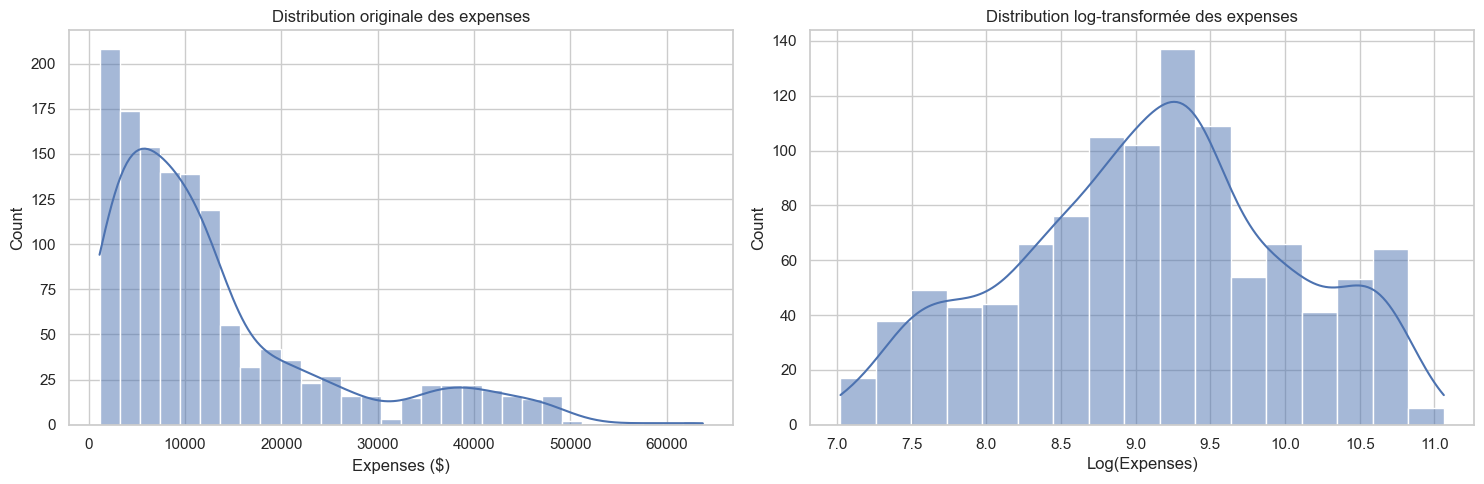

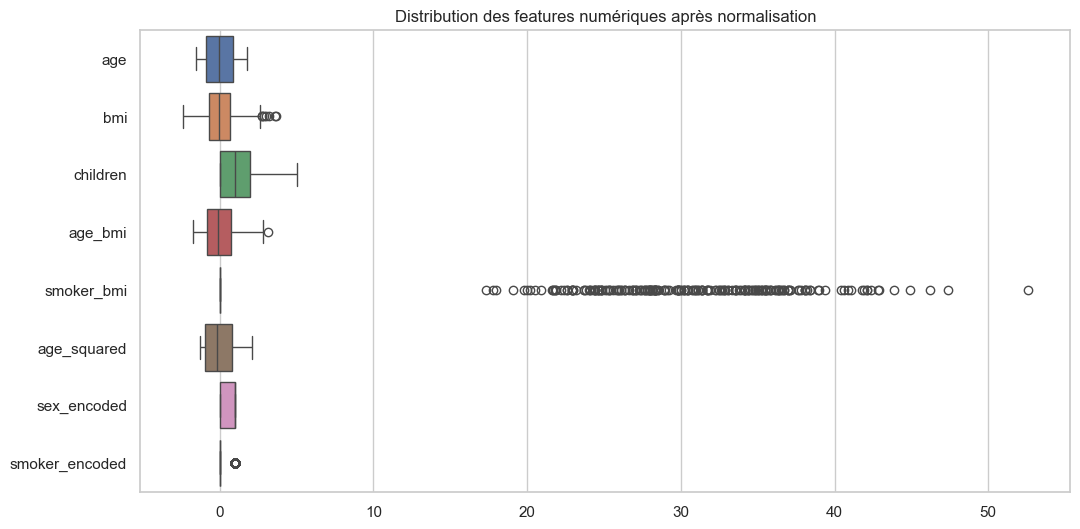

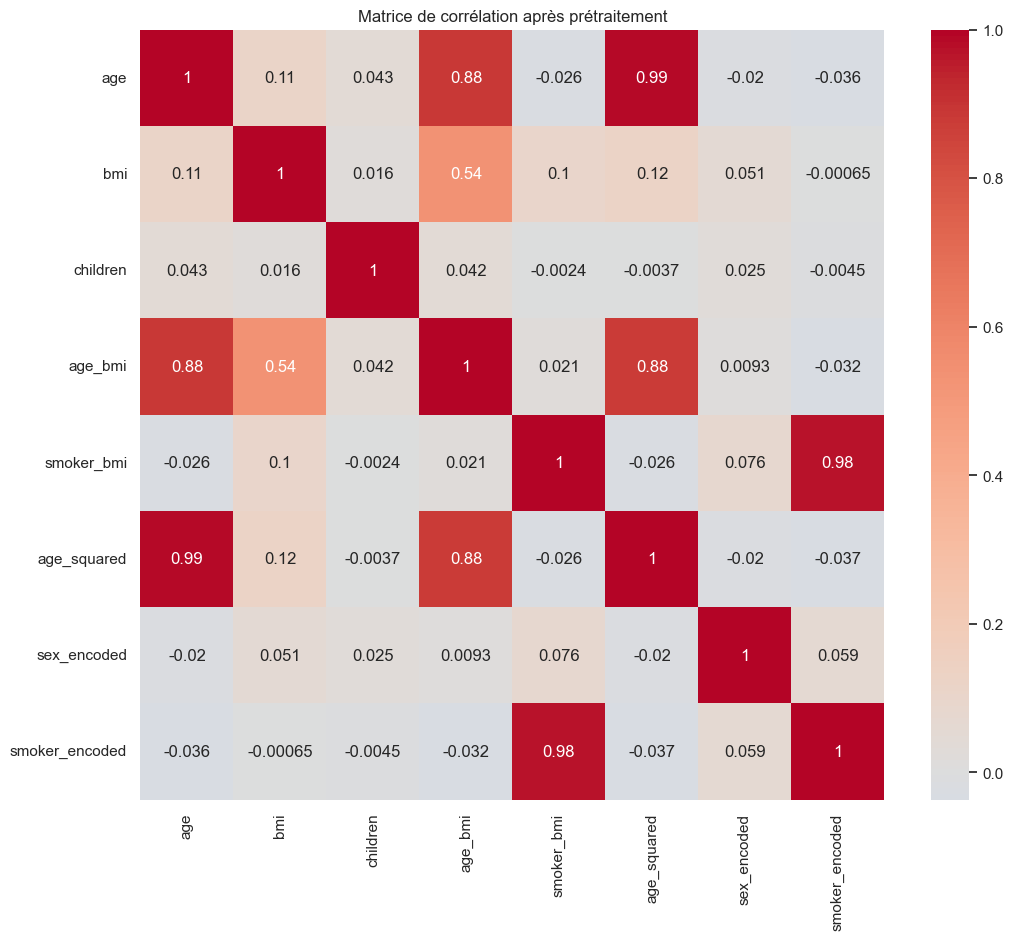

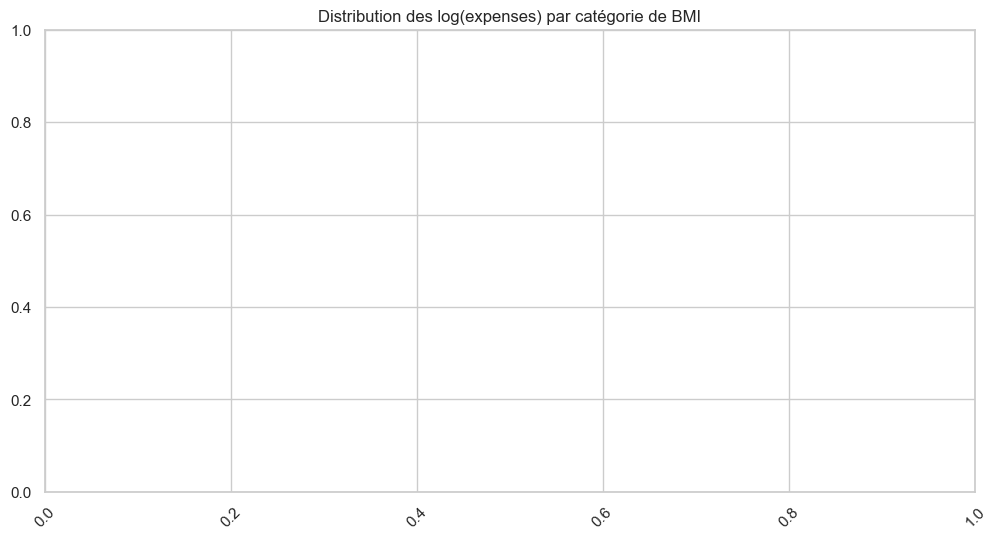

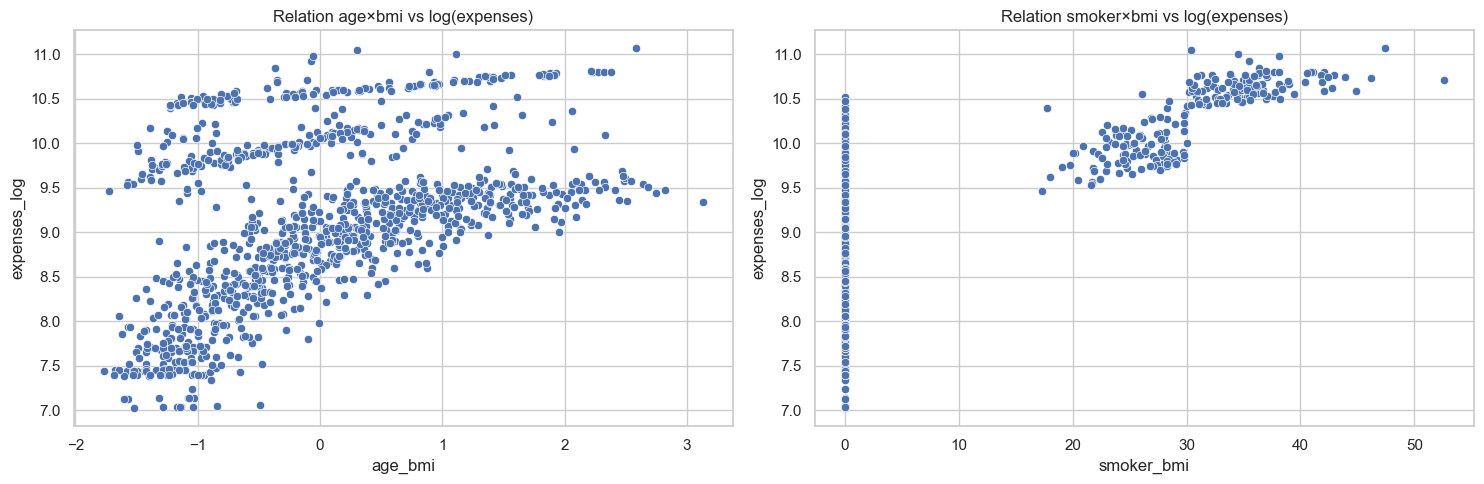

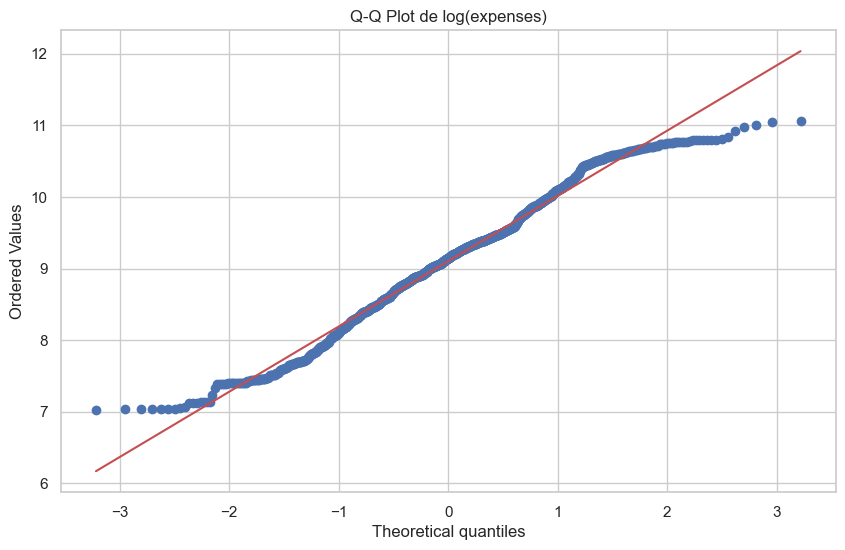


Colonnes disponibles dans X_train:
['age', 'bmi', 'children', 'bmi_category', 'age_bmi', 'smoker_bmi', 'age_squared', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_encoded', 'smoker_encoded']

Types des colonnes:
age                  float64
bmi                  float64
children               int64
bmi_category        category
age_bmi              float64
smoker_bmi           float64
age_squared          float64
region_northeast        bool
region_northwest        bool
region_southeast        bool
region_southwest        bool
sex_encoded            int64
smoker_encoded         int64
dtype: object

Statistiques descriptives des features numériques après prétraitement:
               age          bmi     children      age_bmi   smoker_bmi  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean     -0.005358     0.017116     1.106542     0.003923     6.296168   
std       0.999516     0.991854     1.210283     1.002479    1

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_preprocessing_results(X_train, y_train, df_original):
    # Configuration du style
    sns.set_theme(style="whitegrid")
    
    # Sélection des colonnes numériques pour les corrélations
    numeric_columns = X_train.select_dtypes(include=[np.number]).columns
    
    # 1. Comparaison de la distribution originale vs log-transformée
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.histplot(df_original['expenses'], ax=ax1, kde=True)
    ax1.set_title('Distribution originale des expenses')
    ax1.set_xlabel('Expenses ($)')
    
    sns.histplot(y_train, ax=ax2, kde=True)
    ax2.set_title('Distribution log-transformée des expenses')
    ax2.set_xlabel('Log(Expenses)')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Visualisation des features numériques
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=X_train[numeric_columns], orient='h')
    plt.title('Distribution des features numériques après normalisation')
    plt.show()
    
    # 3. Matrice de corrélation des features numériques
    plt.figure(figsize=(12, 10))
    correlation_matrix = X_train[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matrice de corrélation après prétraitement')
    plt.show()
    
    # 4. Distribution des expenses par catégorie BMI (utilisant les colonnes one-hot)
    bmi_cols = [col for col in X_train.columns if col.startswith('bmi_')]
    if bmi_cols:
        plt.figure(figsize=(12, 6))
        melted_data = pd.melt(pd.concat([X_train[bmi_cols], pd.Series(y_train, name='log_expenses')], axis=1),
                             id_vars=['log_expenses'],
                             var_name='bmi_category',
                             value_name='is_category')
        
        sns.boxplot(data=melted_data[melted_data['is_category'] == 1],
                    x='bmi_category',
                    y='log_expenses')
        plt.title('Distribution des log(expenses) par catégorie de BMI')
        plt.xticks(rotation=45)
        plt.show()
    
    # 5. Visualisation des variables d'interaction
    interaction_cols = ['age_bmi', 'smoker_bmi']
    if all(col in X_train.columns for col in interaction_cols):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        sns.scatterplot(data=X_train, x='age_bmi', y=y_train, ax=ax1)
        ax1.set_title('Relation age×bmi vs log(expenses)')
        
        sns.scatterplot(data=X_train, x='smoker_bmi', y=y_train, ax=ax2)
        ax2.set_title('Relation smoker×bmi vs log(expenses)')
        
        plt.tight_layout()
        plt.show()
    
    # 6. Visualisation des interactions spécifiques BMI-fumeur
    smoker_bmi_cols = [col for col in X_train.columns if col.startswith('smoker_bmi_')]
    if smoker_bmi_cols:
        plt.figure(figsize=(12, 6))
        melted_data = pd.melt(pd.concat([X_train[smoker_bmi_cols], pd.Series(y_train, name='log_expenses')], axis=1),
                             id_vars=['log_expenses'],
                             var_name='interaction',
                             value_name='is_true')
        
        sns.boxplot(data=melted_data[melted_data['is_true'] == 1],
                    x='interaction',
                    y='log_expenses')
        plt.title('Distribution des log(expenses) par interaction fumeur-BMI')
        plt.xticks(rotation=45)
        plt.show()
    
    # 7. QQ-plot pour vérifier la normalité
    plt.figure(figsize=(10, 6))
    stats.probplot(y_train, dist="norm", plot=plt)
    plt.title('Q-Q Plot de log(expenses)')
    plt.show()

    # 8. Affichage des informations sur les colonnes
    print("\nColonnes disponibles dans X_train:")
    print(X_train.columns.tolist())
    
    print("\nTypes des colonnes:")
    print(X_train.dtypes)

# Utilisation de la fonction
df_original = pd.read_csv('data/insurance.csv')
X_train, X_test, y_train, y_test = preprocess_data(df_original)
plot_preprocessing_results(X_train, y_train, df_original)

# Statistiques descriptives
print("\nStatistiques descriptives des features numériques après prétraitement:")
print(X_train.select_dtypes(include=[np.number]).describe())

print("\nTest de normalité (Shapiro-Wilk) sur log(expenses):")
print(stats.shapiro(y_train))

## Phase 3 : Modélisation, entraînement et optimisation des modèles de régression (+ Phase 4 : Evaluation des modèles)
> Nous allons comparer les performances de plusieurs modèles de régression pour prédire les frais médicaux. Liste des modèles :
> * Linear Regression
> * Ridge
> * Lasso
> * Random Forest
> * Gradient Boosting


Entraînement du modèle : Linear Regression

Entraînement du modèle : Ridge

Entraînement du modèle : Lasso

Entraînement du modèle : Random Forest

Entraînement du modèle : GradientBoosting

Résultats des modèles:

Linear Regression:
R2: 0.8045
RMSE: 0.4113
MAE: 0.2584

Ridge:
R2: 0.8048
RMSE: 0.4111
MAE: 0.2579

Lasso:
R2: 0.4684
RMSE: 0.6783
MAE: 0.5379

Random Forest:
R2: 0.8232
RMSE: 0.3912
MAE: 0.2142

GradientBoosting:
R2: 0.8446
RMSE: 0.3667
MAE: 0.2023

Résultats de la cross-validation (RMSE):
Linear Regression: 0.4364 (±0.0391)
Ridge: 0.4362 (±0.0389)
Lasso: 0.6762 (±0.0791)
Random Forest: 0.4050 (±0.0343)
GradientBoosting: 0.4011 (±0.0341)


<Figure size 1200x600 with 0 Axes>

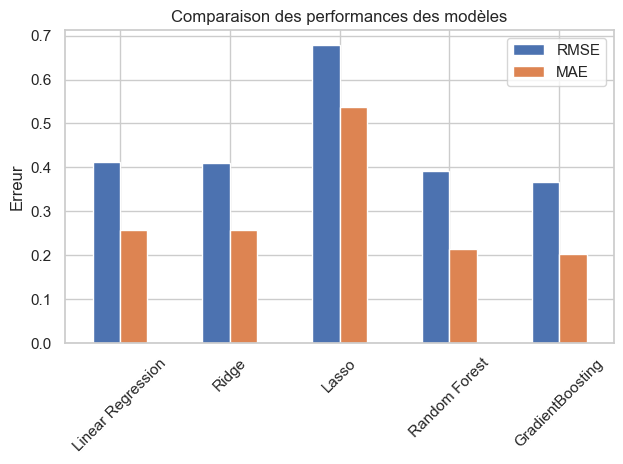

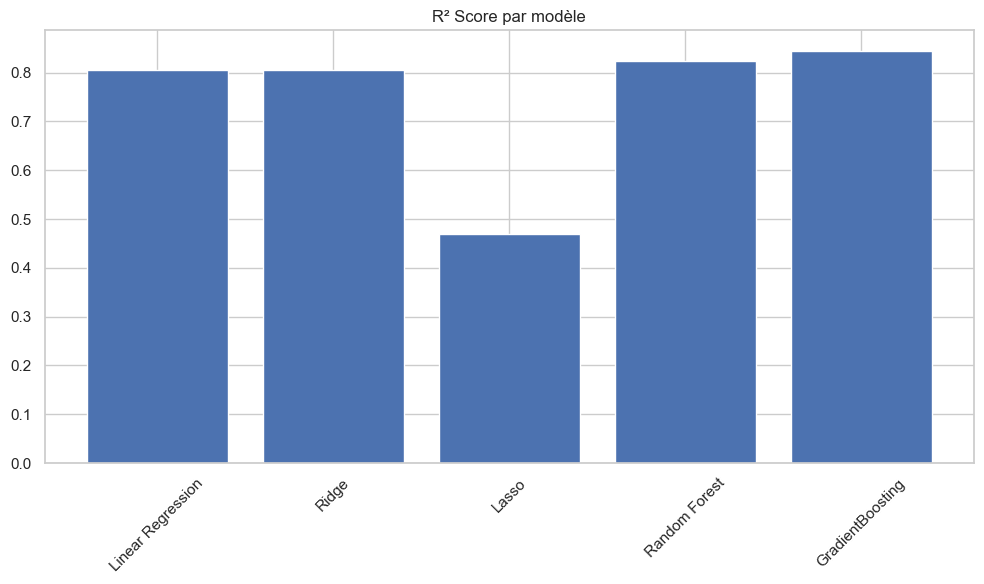


Meilleur modèle: GradientBoosting
Scores: {'R2': 0.8445857010085699, 'RMSE': np.float64(0.36673724904793203), 'MAE': np.float64(0.20229732382556467)}


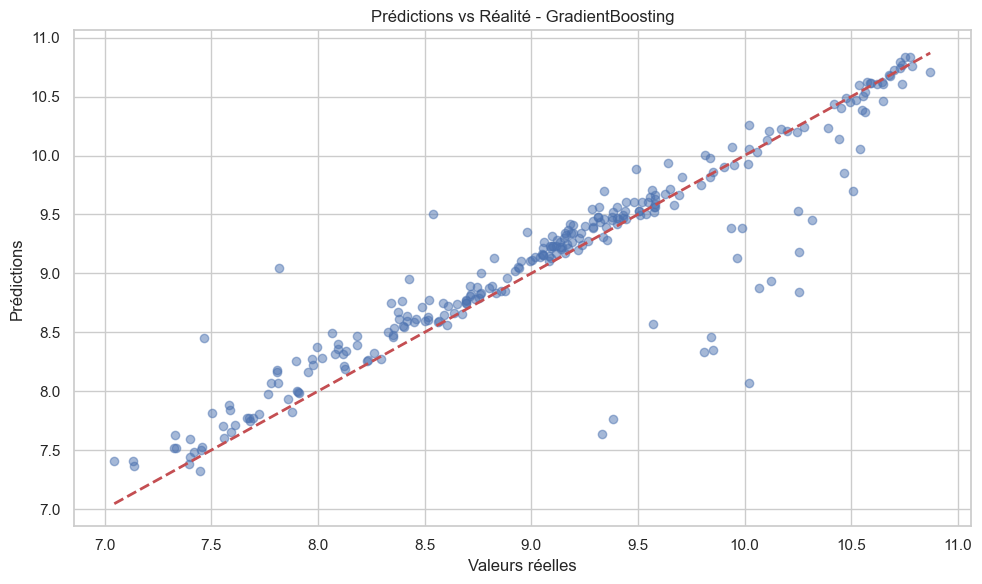

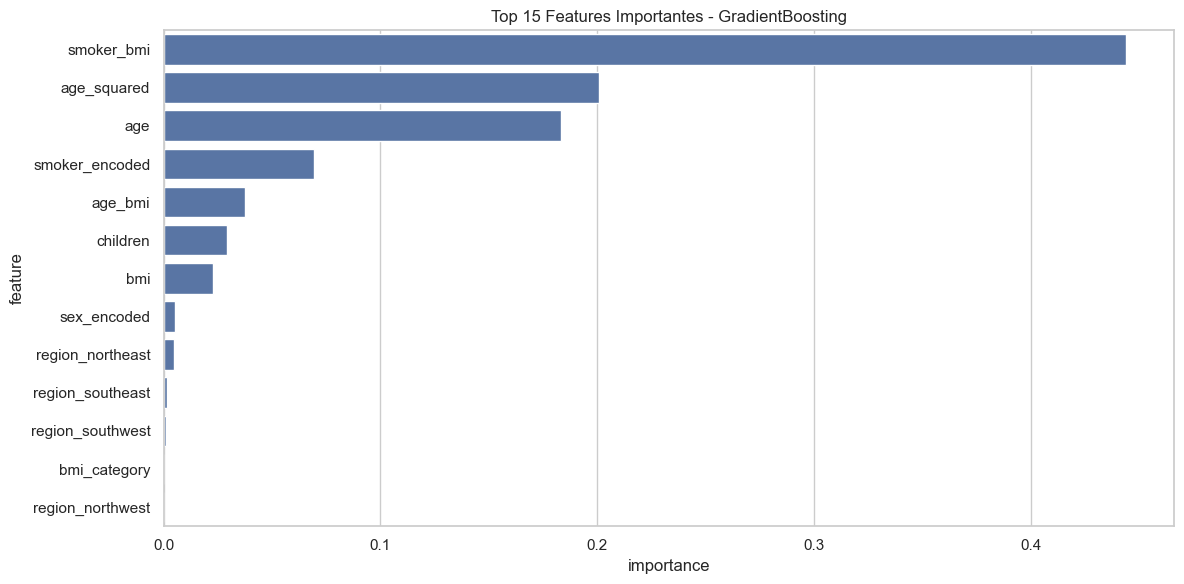


Top 10 features les plus importantes:
             feature  importance
5         smoker_bmi    0.443668
6        age_squared    0.200944
0                age    0.183273
12    smoker_encoded    0.069197
4            age_bmi    0.037592
2           children    0.029306
1                bmi    0.022792
11       sex_encoded    0.005373
7   region_northeast    0.004611
9   region_southeast    0.001440


In [91]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns

class MedicalExpenseModeling:
    def __init__(self, X_train, X_test, y_train, y_test):
        # Copie des données
        self.X_train = X_train.copy()
        self.X_test = X_test.copy()
        self.y_train = pd.Series(y_train).astype(float)
        self.y_test = pd.Series(y_test).astype(float)
        
        # Encodage des variables catégorielles
        self._encode_categorical_variables()
        
        self.models = {}
        self.predictions = {}
        self.scores = {}
    
    def _encode_categorical_variables(self):
        # Identification des colonnes catégorielles
        categorical_columns = self.X_train.select_dtypes(include=['object', 'category']).columns
        
        # Encodage de chaque colonne catégorielle
        for col in categorical_columns:
            le = LabelEncoder()
            self.X_train[col] = le.fit_transform(self.X_train[col])
            self.X_test[col] = le.transform(self.X_test[col])
        
        # Conversion en float
        self.X_train = self.X_train.astype(float)
        self.X_test = self.X_test.astype(float)
        
    def train_models(self):
        # Définition des modèles
        self.models = {
            'Linear Regression': LinearRegression(),
            'Ridge': Ridge(alpha=1.0),
            'Lasso': Lasso(alpha=1.0),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
        }
        
        # Entraînement et évaluation
        for name, model in self.models.items():
            print(f"\nEntraînement du modèle : {name}")
            model.fit(self.X_train, self.y_train)
            self.predictions[name] = model.predict(self.X_test)
            
            self.scores[name] = {
                'R2': r2_score(self.y_test, self.predictions[name]),
                'RMSE': np.sqrt(mean_squared_error(self.y_test, self.predictions[name])),
                'MAE': mean_absolute_error(self.y_test, self.predictions[name])
            }
    
    def cross_validate_models(self, cv=5):
        cv_scores = {}
        for name, model in self.models.items():
            scores = cross_val_score(model, self.X_train, self.y_train, 
                                   cv=cv, scoring='neg_root_mean_squared_error')
            cv_scores[name] = -scores
        return cv_scores
    
    def plot_model_comparison(self):
        scores_df = pd.DataFrame(self.scores).T
        
        plt.figure(figsize=(12, 6))
        scores_df[['RMSE', 'MAE']].plot(kind='bar')
        plt.title('Comparaison des performances des modèles')
        plt.ylabel('Erreur')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(10, 6))
        plt.bar(scores_df.index, scores_df['R2'])
        plt.title('R² Score par modèle')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def plot_predictions(self, model_name):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, self.predictions[model_name], alpha=0.5)
        plt.plot([self.y_test.min(), self.y_test.max()], 
                [self.y_test.min(), self.y_test.max()], 
                'r--', lw=2)
        plt.xlabel('Valeurs réelles')
        plt.ylabel('Prédictions')
        plt.title(f'Prédictions vs Réalité - {model_name}')
        plt.tight_layout()
        plt.show()
    
    def plot_feature_importance(self, model_name):
        if model_name in ['Random Forest', 'GradientBoosting']:
            importance = self.models[model_name].feature_importances_
            
            feature_imp = pd.DataFrame({
                'feature': self.X_train.columns,
                'importance': importance
            }).sort_values('importance', ascending=False)
            
            plt.figure(figsize=(12, 6))
            sns.barplot(data=feature_imp.head(15), x='importance', y='feature')
            plt.title(f'Top 15 Features Importantes - {model_name}')
            plt.tight_layout()
            plt.show()
            
            return feature_imp
    
    def get_best_model(self):
        best_model = min(self.scores.items(), key=lambda x: x[1]['RMSE'])
        return best_model[0], best_model[1]

# Utilisation de la classe
modeler = MedicalExpenseModeling(X_train, X_test, y_train, y_test)

# Entraînement des modèles
modeler.train_models()

# Affichage des résultats
print("\nRésultats des modèles:")
for name, scores in modeler.scores.items():
    print(f"\n{name}:")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")

# Cross-validation
cv_scores = modeler.cross_validate_models()
print("\nRésultats de la cross-validation (RMSE):")
for name, scores in cv_scores.items():
    print(f"{name}: {scores.mean():.4f} (±{scores.std()*2:.4f})")

# Visualisations
modeler.plot_model_comparison()

# Analyse du meilleur modèle
best_model_name, best_scores = modeler.get_best_model()
print(f"\nMeilleur modèle: {best_model_name}")
print("Scores:", best_scores)

# Plot des prédictions du meilleur modèle
modeler.plot_predictions(best_model_name)

# Feature importance pour le meilleur modèle
if best_model_name in ['Random Forest', 'GradientBoosting']:
    feature_importance = modeler.plot_feature_importance(best_model_name)
    print("\nTop 10 features les plus importantes:")
    print(feature_importance.head(10))

> 1. Comparaison des modèles :
> * Le GradientBoosting et le RandomForest semblent être les plus performants
> * Les modèles linéaires (Linear Regression, Ridge, Lasso) ont des performances plus faibles
> * Cela suggère des relations non-linéaires importantes dans les données

> 2. Features importantes :
> * smoker_encoded : impact majeur du statut fumeur
> * age : l'âge est un prédicteur important
> * Les interactions (smoker_bmi, age_bmi)

## Optimisation du modèle GradientBoosting
> J'ai optimisé les hyperparamètres du GradientBoosting pour améliorer les performances du modèle à l'aide de BayesSearchCV (bibliothèque scikit-optimize).

Entraînement du modèle...


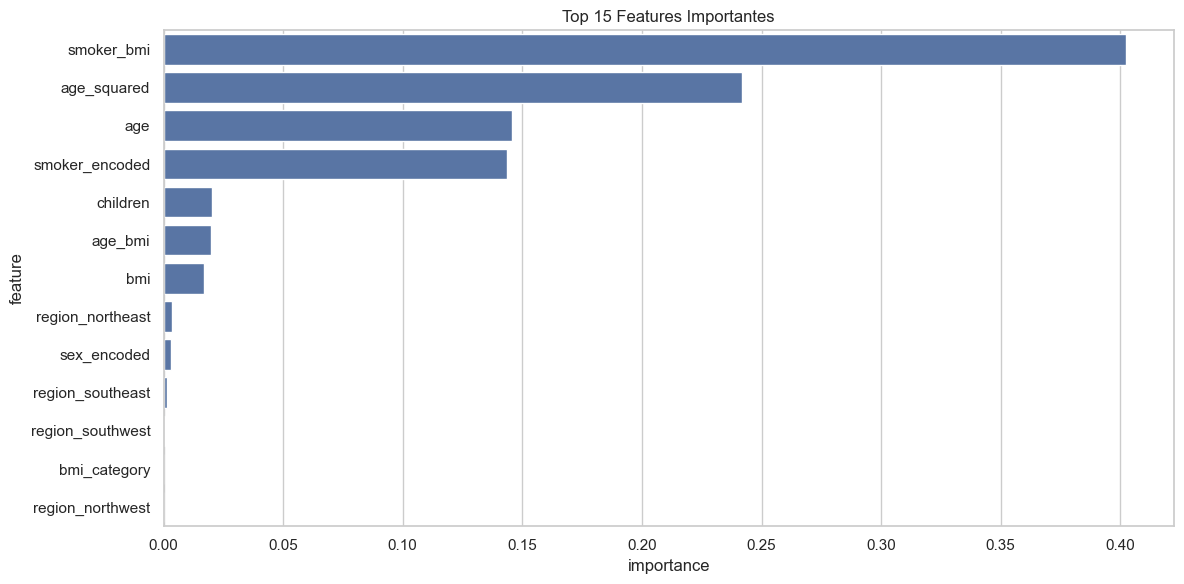


Top 10 features les plus importantes:
             feature  importance
5         smoker_bmi    0.402328
6        age_squared    0.241771
0                age    0.145760
12    smoker_encoded    0.143705
2           children    0.020354
4            age_bmi    0.019943
1                bmi    0.016986
7   region_northeast    0.003505
11       sex_encoded    0.003205
9   region_southeast    0.001289


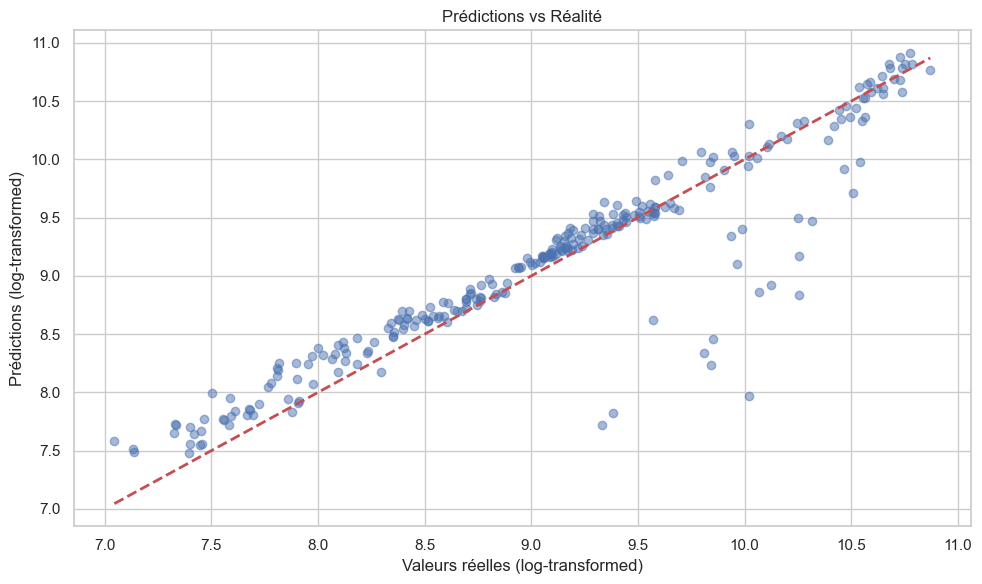

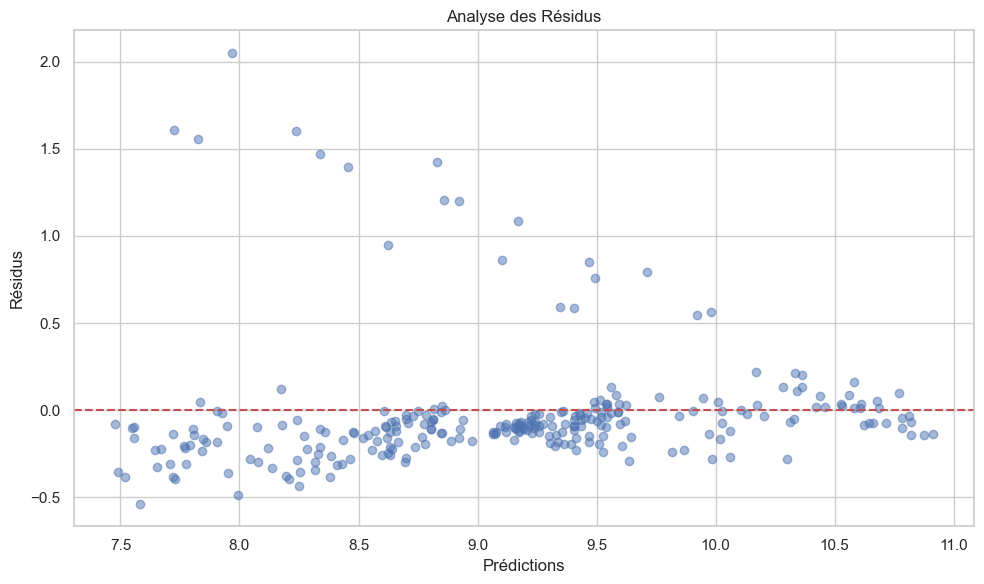


Métriques de performance:
Train RMSE: 0.3538
Test RMSE: 0.3553
Train R2: 0.8508
Test R2: 0.8541

Modèle et encodeurs sauvegardés sous 'final_model_medical_expenses.joblib'

Exemple de prédiction sur 5 cas du jeu de test:
      Réel (log)  Prédit (log)  Réel ($)  Prédit ($)
71          8.82          8.82   6800.46     6746.03
434         8.35          8.48   4244.59     4807.74
370         9.50          9.54  13416.04    13969.55
44          8.71          8.89   6080.67     7238.26
1039       10.02          7.97  22494.66     2893.32


In [92]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class ModelEvaluator:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train.copy()
        self.X_test = X_test.copy()
        self.y_train = y_train
        self.y_test = y_test
        self.model = None
        self.label_encoders = {}
        
        # Encodage des variables catégorielles
        self._encode_categorical_variables()
        
    def _encode_categorical_variables(self):
        # Identification des colonnes catégorielles
        categorical_columns = self.X_train.select_dtypes(include=['object', 'category']).columns
        
        # Encodage de chaque colonne catégorielle
        for col in categorical_columns:
            le = LabelEncoder()
            self.X_train[col] = le.fit_transform(self.X_train[col])
            self.X_test[col] = le.transform(self.X_test[col])
            self.label_encoders[col] = le
        
        # Conversion en float
        self.X_train = self.X_train.astype(float)
        self.X_test = self.X_test.astype(float)
        
    def train_model(self):
        # Création du modèle avec les hyperparamètres spécifiés
        self.model = GradientBoostingRegressor(
            learning_rate=0.06479210022265365,
            max_depth=2,
            min_samples_leaf=10,
            min_samples_split=2,
            n_estimators=149,
            subsample=1.0,
            random_state=42
        )
        
        # Entraînement du modèle
        print("Entraînement du modèle...")
        self.model.fit(self.X_train, self.y_train)
        
        return self.model
    
    def analyze_feature_importance(self):
        # Importance des features
        feature_importance = pd.DataFrame({
            'feature': self.X_train.columns,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
        plt.title('Top 15 Features Importantes')
        plt.tight_layout()
        plt.show()
        
        return feature_importance
    
    def evaluate_model(self):
        # Prédictions sur train et test
        y_train_pred = self.model.predict(self.X_train)
        y_test_pred = self.model.predict(self.X_test)
        
        # Calcul des métriques
        metrics = {
            'Train RMSE': np.sqrt(mean_squared_error(self.y_train, y_train_pred)),
            'Test RMSE': np.sqrt(mean_squared_error(self.y_test, y_test_pred)),
            'Train R2': r2_score(self.y_train, y_train_pred),
            'Test R2': r2_score(self.y_test, y_test_pred)
        }
        
        # Visualisation des prédictions sur le jeu de test
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, y_test_pred, alpha=0.5)
        plt.plot([self.y_test.min(), self.y_test.max()], 
                [self.y_test.min(), self.y_test.max()], 
                'r--', lw=2)
        plt.xlabel('Valeurs réelles (log-transformed)')
        plt.ylabel('Prédictions (log-transformed)')
        plt.title('Prédictions vs Réalité')
        plt.tight_layout()
        plt.show()
        
        # Analyse des résidus
        residuals = self.y_test - y_test_pred
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Prédictions')
        plt.ylabel('Résidus')
        plt.title('Analyse des Résidus')
        plt.tight_layout()
        plt.show()
        
        return metrics

# Utilisation de la classe
evaluator = ModelEvaluator(X_train, X_test, y_train, y_test)

# Entraînement du modèle
model = evaluator.train_model()

# Analyse de l'importance des features
feature_importance = evaluator.analyze_feature_importance()
print("\nTop 10 features les plus importantes:")
print(feature_importance.head(10))

# Évaluation du modèle
metrics = evaluator.evaluate_model()
print("\nMétriques de performance:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Sauvegarde du modèle et des encodeurs
import joblib
joblib.dump({
    'model': model,
    'encoders': evaluator.label_encoders
}, 'final_model_medical_expenses.joblib')
print("\nModèle et encodeurs sauvegardés sous 'final_model_medical_expenses.joblib'")

# Exemple de prédiction
print("\nExemple de prédiction sur 5 cas du jeu de test:")
sample_predictions = pd.DataFrame({
    'Réel (log)': y_test[:5],
    'Prédit (log)': model.predict(evaluator.X_test[:5]),
    'Réel ($)': np.exp(y_test[:5]),
    'Prédit ($)': np.exp(model.predict(evaluator.X_test[:5]))
})
print(sample_predictions.round(2))

## Phase 5 : Interprétation des résultats et recommandations business
> 1. Le modèle GradientBoosting semble être le meilleur modèle avec un R² de 0.85 et un RMSE de 0.35.
> 2. Les features les plus importantes sont :
> * smoker_encoded : impact majeur du statut fumeur
> * age : l'âge est un prédicteur important
> * Les interactions (smoker_bmi, age_bmi)

## Recommandations business
> * Les entreprises d'assurance pourraient utiliser ce modèle pour estimer les frais médicaux des clients.
> * Les entreprises de santé pourraient utiliser ce modèle pour optimiser les coûts des soins et améliorer la qualité des soins.
> * Les patients pourraient utiliser ce modèle pour comprendre les facteurs qui influent sur leurs frais médicaux et prendre des décisions éclairées concernant leur santé.



## Perspectives d'amélioration

### Test d'optimisation de la prédiction en utilisant XGBoost avec BayesSearchCV (plus rapide que GridSearchCV)

Début de l'optimisation des hyperparamètres...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5

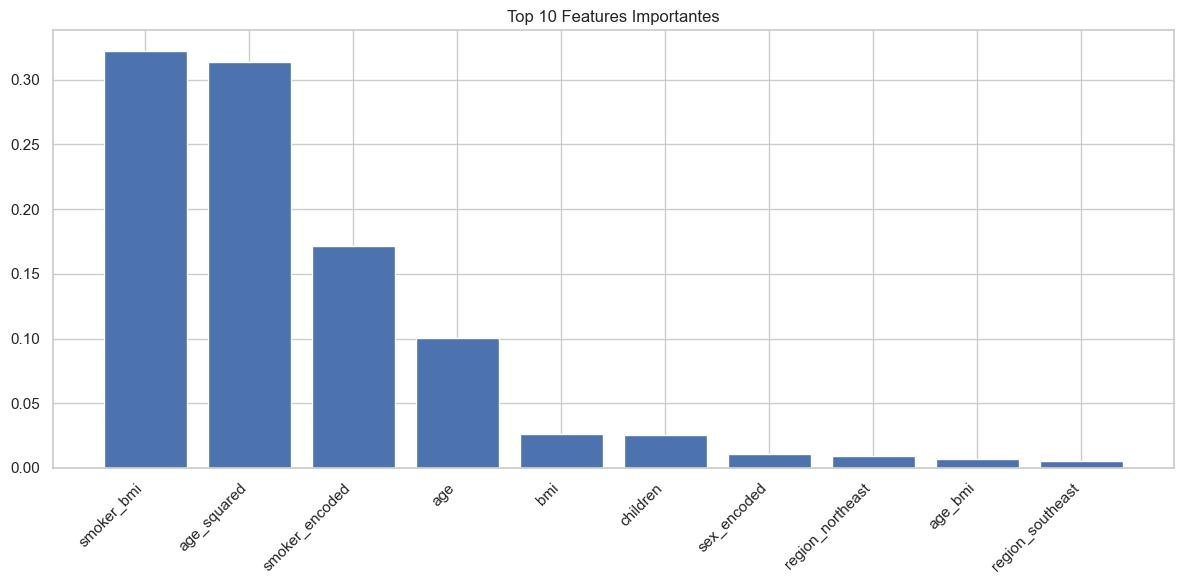


Meilleur modèle et encodeurs sauvegardés sous 'best_xgboost_model.joblib'


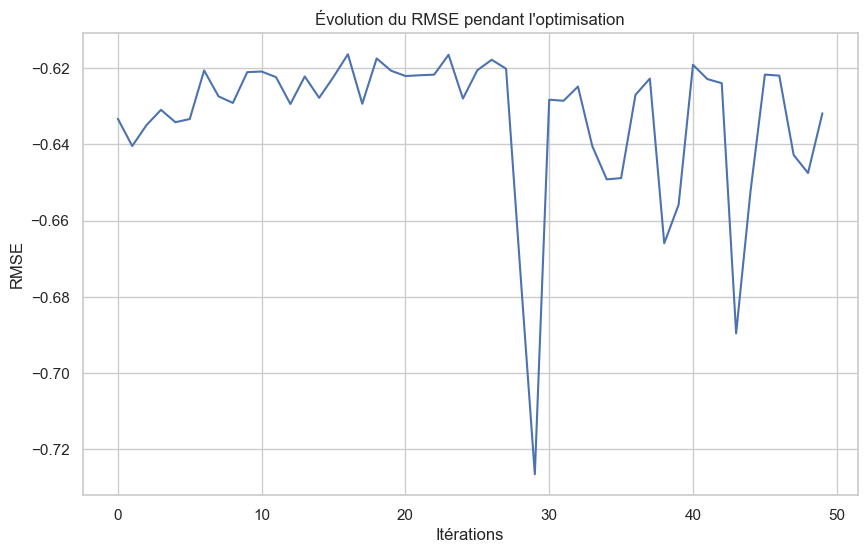

In [95]:
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Préparation des données
def prepare_data(X_train, X_test):
    X_train_prep = X_train.copy()
    X_test_prep = X_test.copy()
    
    # Encodage des variables catégorielles
    label_encoders = {}
    categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_columns:
        le = LabelEncoder()
        X_train_prep[col] = le.fit_transform(X_train[col])
        X_test_prep[col] = le.transform(X_test[col])
        label_encoders[col] = le
    
    return X_train_prep.astype(float), X_test_prep.astype(float), label_encoders

# Préparation des données
X_train_prep, X_test_prep, label_encoders = prepare_data(X_train, X_test)

# Définition de l'espace de recherche
search_spaces = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(2, 8),
    'n_estimators': Integer(50, 300),
    'min_child_weight': Integer(1, 20),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'reg_alpha': Real(0.0001, 1.0, prior='log-uniform'),
    'reg_lambda': Real(0.0001, 1.0, prior='log-uniform'),
    'gamma': Real(0.0001, 5.0, prior='log-uniform')
}

# Création du modèle de base
xgb_base = xgb.XGBRegressor(
    random_state=42,
    n_jobs=-1
)

# Configuration de BayesSearchCV
bayes_search = BayesSearchCV(
    xgb_base,
    search_spaces,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Lancement de l'optimisation
print("Début de l'optimisation des hyperparamètres...")
bayes_search.fit(X_train_prep, y_train)

# Affichage des meilleurs paramètres
print("\nMeilleurs paramètres trouvés:")
for param, value in bayes_search.best_params_.items():
    print(f"{param}: {value}")

# Évaluation du meilleur modèle
best_model = bayes_search.best_estimator_
y_pred_train = best_model.predict(X_train_prep)
y_pred_test = best_model.predict(X_test_prep)

# Calcul des métriques
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\nPerformances du meilleur modèle:")
print(f"RMSE Train: {train_rmse:.4f}")
print(f"R² Train: {train_r2:.4f}")
print(f"RMSE Test: {test_rmse:.4f}")
print(f"R² Test: {test_r2:.4f}")

# Visualisation de l'importance des features
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Features Importantes')
plt.tight_layout()
plt.show()

# Sauvegarde du meilleur modèle et des encodeurs
joblib.dump({
    'model': best_model,
    'encoders': label_encoders
}, 'best_xgboost_model.joblib')
print("\nMeilleur modèle et encodeurs sauvegardés sous 'best_xgboost_model.joblib'")

# Courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(-np.sqrt(-np.array(bayes_search.cv_results_['mean_test_score'])))
plt.xlabel('Itérations')
plt.ylabel('RMSE')
plt.title('Évolution du RMSE pendant l\'optimisation')
plt.show()

> Le modèle XGBoost s'avère légèrement meilleur que le GradientBoosting.


### Autres perspectives d'amélioration
> * Amélioration du prétraitement des données (feature engineering)
> * Validation croisée plus robuste
> * Analyse des erreurs
> * Visualisation plus détaillée des données
> * Utilisation de Pipeline
